In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew

In [13]:
df = pd.read_csv(r'C:\Users\Aditya Sharma\Pictures\Desktop\archive\adult.csv')
print(df.head())
print(df.info())
print(df.columns)
print(df.isnull().sum())
print(df.describe(include="all"))

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

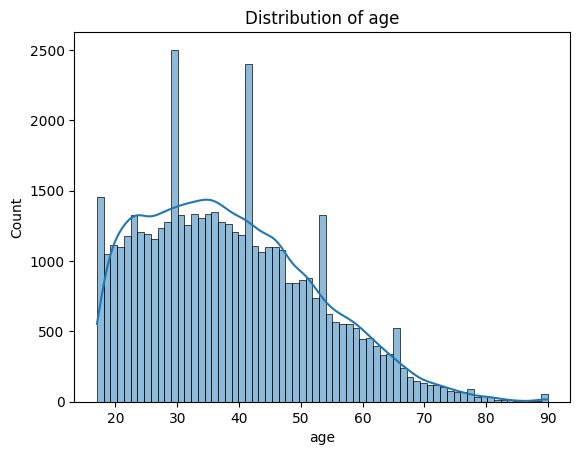

age skewness: 0.5575631924658626


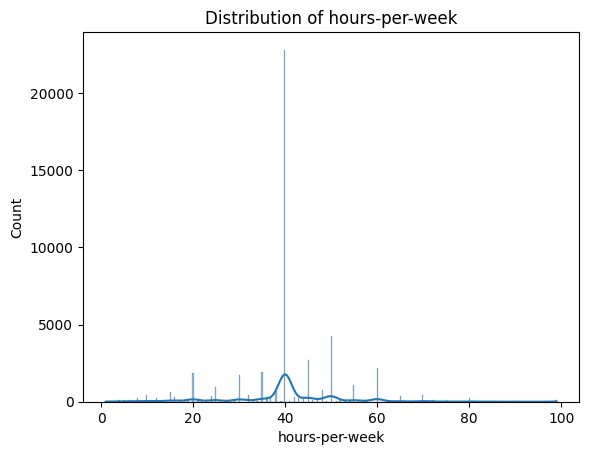

hours-per-week skewness: 0.23874232483428423


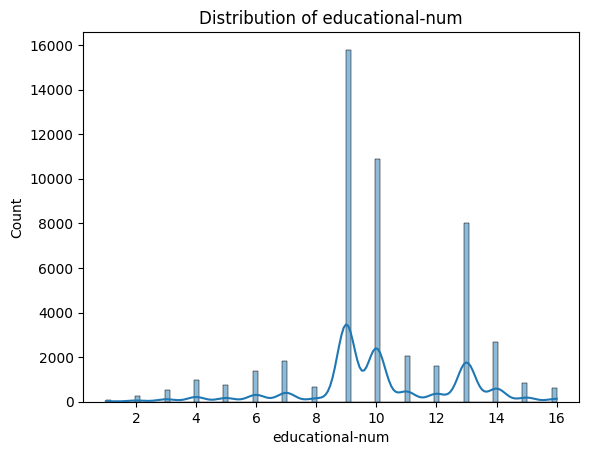

educational-num skewness: -0.3165151356965018


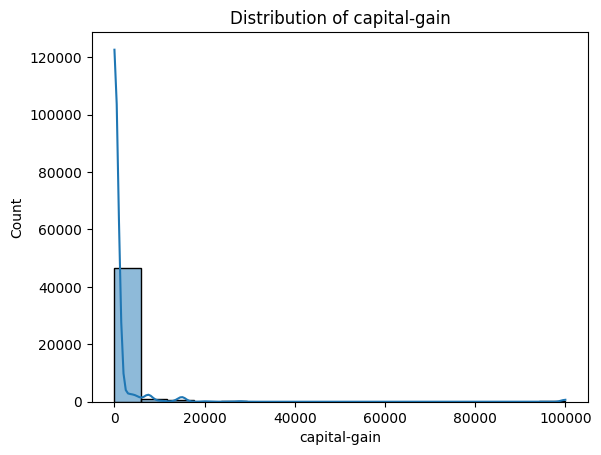

capital-gain skewness: 11.894293693350866


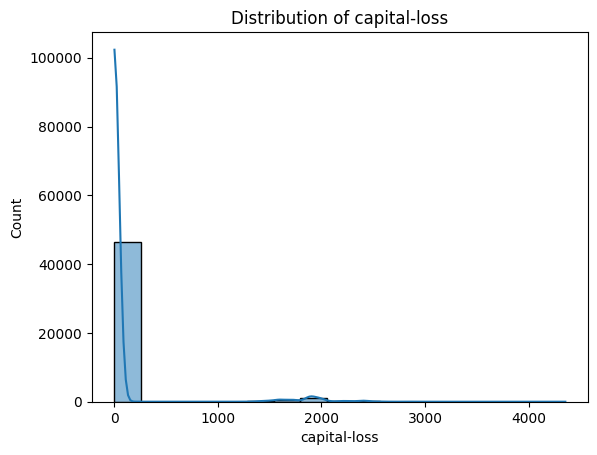

capital-loss skewness: 4.569668511893424


In [14]:
key_vars = ["age", "hours-per-week", "educational-num", "capital-gain", "capital-loss"]

for var in key_vars:
    sns.histplot(df[var], kde=True)
    plt.title(f"Distribution of {var}")
    plt.show()
    print(f"{var} skewness: {skew(df[var].dropna())}")


In [15]:
summary = {}
for var in key_vars:
    data = df[var].dropna()
    summary[var] = {
        "mean": data.mean(),
        "median": data.median(),
        "mode": data.mode()[0],
    }

summary_df = pd.DataFrame(summary).T
print(summary_df)


                        mean  median  mode
age                38.643585    37.0  36.0
hours-per-week     40.422382    40.0  40.0
educational-num    10.078089    10.0   9.0
capital-gain     1079.067626     0.0   0.0
capital-loss       87.502314     0.0   0.0


In [ ]:

variability = {}
for var in key_vars:
    data = df[var].dropna()
    variability[var] = {
        "range": data.max() - data.min(),
        "variance": data.var(),
        "std_dev": data.std(),
        "IQR": data.quantile(0.75) - data.quantile(0.25),
        "CV": data.std() / data.mean() if data.mean() != 0 else np.nan
    }

variability_df = pd.DataFrame(variability).T
print(variability_df)

for var in key_vars:
    Q1, Q3 = df[var].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = df[(df[var] < Q1 - 1.5*IQR) | (df[var] > Q3 + 1.5*IQR)]
    print(f"{var} outliers: {len(outliers)}")


                   range      variance      std_dev   IQR        CV
age                 73.0  1.879781e+02    13.710510  20.0  0.354794
hours-per-week      98.0  1.535479e+02    12.391444   5.0  0.306549
educational-num     15.0  6.609901e+00     2.570973   3.0  0.255105
capital-gain     99999.0  5.553259e+07  7452.019058   0.0  6.905980
capital-loss      4356.0  1.624127e+05   403.004552   0.0  4.605645
age outliers: 216
hours-per-week outliers: 13496
educational-num outliers: 1794
capital-gain outliers: 4035
capital-loss outliers: 2282


In [17]:
#VARIABLE Selection Justification
print("Age, education-num, hours-per-week, capital-gain, and capital-loss were selected as they directly influence income classification and workforce characteristics.")

#DISTRIBUTION SHAPE and central tendency measure

print ("Age distribution is slightly right-skewed (skewness = 0.45). Median was chosen as the measure of central tendency to reduce sensitivity to outliers.")

#VARIABILITY AND ROBUSTNESS 

print ("Hours-per-week shows high variance and several outliers (values > 80). IQR was prioritized over variance to ensure robustness against extreme values.")

# BUSINESS INSIGHT

print("The presence of extreme capital-gain values suggests a small subset of individuals disproportionately influence income classification. Policies or models should account for this imbalance.")
 



Age, education-num, hours-per-week, capital-gain, and capital-loss were selected as they directly influence income classification and workforce characteristics.
Age distribution is slightly right-skewed (skewness = 0.45). Median was chosen as the measure of central tendency to reduce sensitivity to outliers.
Hours-per-week shows high variance and several outliers (values > 80). IQR was prioritized over variance to ensure robustness against extreme values.
The presence of extreme capital-gain values suggests a small subset of individuals disproportionately influence income classification. Policies or models should account for this imbalance.
